In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline 

In [2]:
data = pd.read_csv('week4.csv')
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [4]:
data.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

In [9]:
numeric = data.select_dtypes(include = ['int','float'] )

<Axes: >

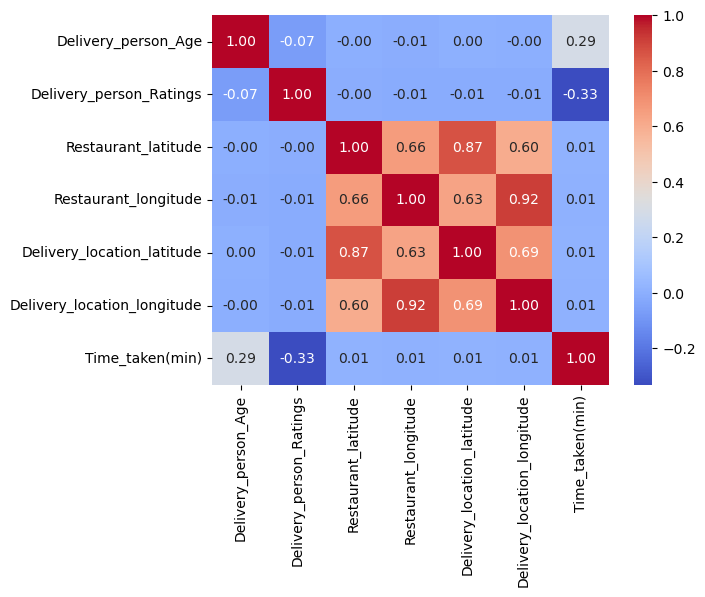

In [10]:
import seaborn as sns

sns.heatmap(numeric.corr(),annot=True, cmap='coolwarm', fmt=".2f")

In [3]:
data.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min)
count,45501.000000,45501.000000,45501.000000,45501.000000,45501.000000,45501.000000,45501.000000
mean,29.544120,4.632340,17.020161,70.238395,17.467833,70.850475,26.293950
std,5.697346,0.327829,8.184361,22.870607,7.333677,21.112215,9.384537
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.600000,12.933284,73.170000,12.989096,73.280283,19.000000
50%,29.000000,4.700000,18.551440,75.897429,18.634382,76.002574,26.000000
75%,34.000000,4.800000,22.728163,78.044095,22.785207,78.107044,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,54.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45501 entries, 0 to 45500
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45501 non-null  object 
 1   Delivery_person_ID           45501 non-null  object 
 2   Delivery_person_Age          45501 non-null  int64  
 3   Delivery_person_Ratings      45501 non-null  float64
 4   Restaurant_latitude          45501 non-null  float64
 5   Restaurant_longitude         45501 non-null  float64
 6   Delivery_location_latitude   45501 non-null  float64
 7   Delivery_location_longitude  45501 non-null  float64
 8   Type_of_order                45501 non-null  object 
 9   Type_of_vehicle              45501 non-null  object 
 10  Time_taken(min)              45501 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


In [12]:
# from math import radians, cos, sin, asin, sqrt
# def distance(lat1, lat2, lon1, lon2):
     
#     # The math module contains a function named
#     # radians which converts from degrees to radians.
#     lon1 = radians(lon1)
#     lon2 = radians(lon2)
#     lat1 = radians(lat1)
#     lat2 = radians(lat2)
      
#     # Haversine formula 
#     dlon = lon2 - lon1 
#     dlat = lat2 - lat1
#     a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 
#     c = 2 * asin(sqrt(a)) 
    
#     # Radius of earth in kilometers. Use 3956 for miles
#     r = 6371
      
#     # calculate the result
#     return(c * r)
     
# data['Distance'] = distance(data['Restaurant_latitude'], data['Delivery_location_latitude'], data['Restaurant_longitude'], data['Delivery_location_longitude'])
# print(distance(lat1, lat2, lon1, lon2), "K.M")

from math import radians, sin, cos, sqrt, atan2
def haversine(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0

    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Calculate the differences between latitudes and longitudes
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Haversine formula
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # Calculate the distance
    distance = R * c

    return distance

data['distance'] = data.apply(lambda row: haversine(row['Restaurant_latitude'], row['Restaurant_longitude'], row['Delivery_location_latitude'], row['Delivery_location_longitude']), axis=1)

In [16]:
data.iloc[5]`

ID                                      9BB4
Delivery_person_ID             HYDRES09DEL03
Delivery_person_Age                       22
Delivery_person_Ratings                  4.8
Restaurant_latitude                17.431668
Restaurant_longitude               78.408321
Delivery_location_latitude         17.461668
Delivery_location_longitude        78.438321
Type_of_order                        Buffet 
Type_of_vehicle                  motorcycle 
Time_taken(min)                           26
distance                            4.610365
Name: 5, dtype: object

In [21]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),distance
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24,3.025149
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33,20.183530
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26,1.552758
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21,7.790401
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30,6.210138


<Axes: >

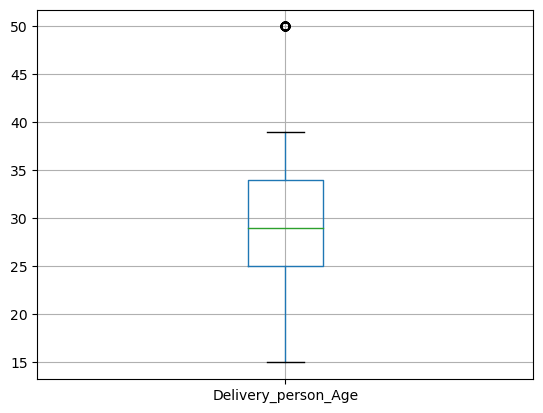

In [19]:
temp = pd.DataFrame(data['Delivery_person_Age'])
temp.boxplot()

<Axes: >

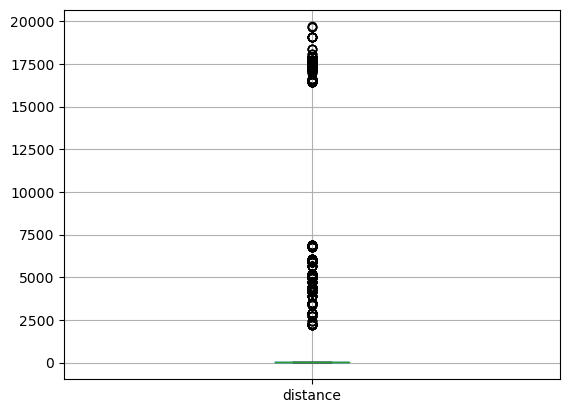

In [39]:
temp = pd.DataFrame(data['distance'])
temp.boxplot()

In [ ]:
distanceSort = data.groupby('Store ID')['Total Price'].sum().sort_values(ascending=False)

In [20]:
data['Delivery_person_Age'].describe()

count    45501.000000
mean        29.544120
std          5.697346
min         15.000000
25%         25.000000
50%         29.000000
75%         34.000000
max         50.000000
Name: Delivery_person_Age, dtype: float64

In [ ]:
import requests
import pandas as pd

def get_coordinates(location):
    url = f'https://nominatim.openstreetmap.org/search?q={location}&format=json'
    response = requests.get(url)
    data = response.json()
    if data:
        return float(data[0]['lat']), float(data[0]['lon'])
    else:
        return None


# Apply the get_coordinates function to each row in the DataFrame
data['Coordinates'] = data['Location'].apply(get_coordinates)

# Display the DataFrame with the obtained coordinatesb
print(data)

NameError: name 'column_name' is not defined

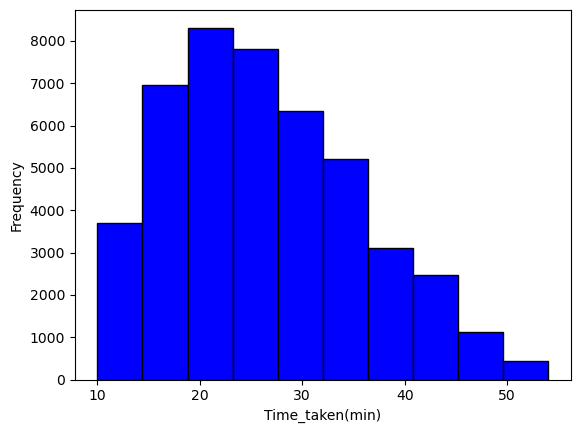

In [23]:
plt.hist(data['Time_taken(min)'], bins=10, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Time_taken(min)')
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name}')

In [25]:
data['Time_taken(min)'].describe()

count    45501.000000
mean        26.293950
std          9.384537
min         10.000000
25%         19.000000
50%         26.000000
75%         32.000000
max         54.000000
Name: Time_taken(min), dtype: float64

In [29]:
data.groupby('Type_of_order')['Time_taken(min)'].mean()

Type_of_order
Buffet     26.287756
Drinks     26.185310
Meal       26.419874
Snack      26.281592
Name: Time_taken(min), dtype: float64

In [30]:
data.corr()

ValueError: could not convert string to float: 'B379'

In [31]:
numdataFrame = data.select_dtypes(include=['number'])

In [32]:
numdataFrame

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min),distance
0,37,4.9,22.745049,75.892471,22.765049,75.912471,24,3.025149
1,34,4.5,12.913041,77.683237,13.043041,77.813237,33,20.183530
2,23,4.4,12.914264,77.678400,12.924264,77.688400,26,1.552758
3,38,4.7,11.003669,76.976494,11.053669,77.026494,21,7.790401
4,32,4.6,12.972793,80.249982,13.012793,80.289982,30,6.210138
...,...,...,...,...,...,...,...,...
45496,37,4.9,13.044694,80.261470,13.094694,80.311470,12,7.761498
45497,38,4.8,0.000000,0.000000,0.090000,0.090000,29,14.152801
45498,22,4.7,21.183434,72.814492,21.273434,72.904492,17,13.681057
45499,25,5.0,30.342509,78.061187,30.392509,78.111187,17,7.343128


In [33]:
numdataFrame.corr()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min),distance
Delivery_person_Age,1.000000,-0.067443,-0.001816,-0.006635,0.002530,-0.000387,0.292537,0.014327
Delivery_person_Ratings,-0.067443,1.000000,-0.004857,-0.011282,-0.010207,-0.013477,-0.331348,-0.006210
Restaurant_latitude,-0.001816,-0.004857,1.000000,0.661575,0.866188,0.602609,0.014141,-0.369438
Restaurant_longitude,-0.006635,-0.011282,0.661575,1.000000,0.632328,0.915294,0.008122,-0.353766
Delivery_location_latitude,0.002530,-0.010207,0.866188,0.632328,1.000000,0.690479,0.014440,0.030275
Delivery_location_longitude,-0.000387,-0.013477,0.602609,0.915294,0.690479,1.000000,0.007987,0.027140
Time_taken(min),0.292537,-0.331348,0.014141,0.008122,0.014440,0.007987,1.000000,-0.002430
distance,0.014327,-0.006210,-0.369438,-0.353766,0.030275,0.027140,-0.002430,1.000000


In [35]:
len(data['Delivery_person_ID'].unique())

1320

Text(0, 0.5, 'Frequency')

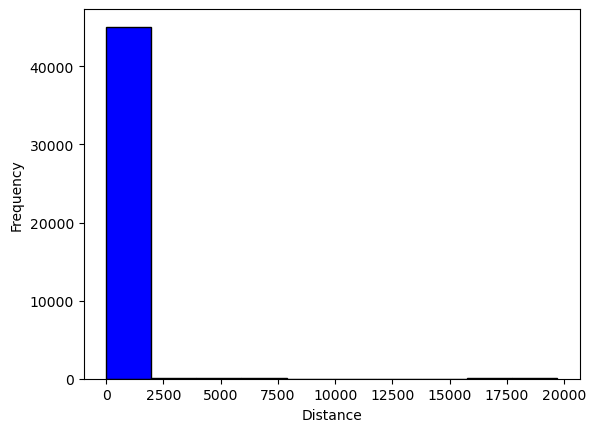

In [13]:
plt.hist(data['distance'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Distance')
plt.ylabel('Frequency')

In [40]:
data.groupby('Type_of_vehicle')['Time_taken(min)'].mean()

Type_of_vehicle
bicycle              26.426471
electric_scooter     24.472799
motorcycle           27.605049
scooter              24.478911
Name: Time_taken(min), dtype: float64

<Axes: >

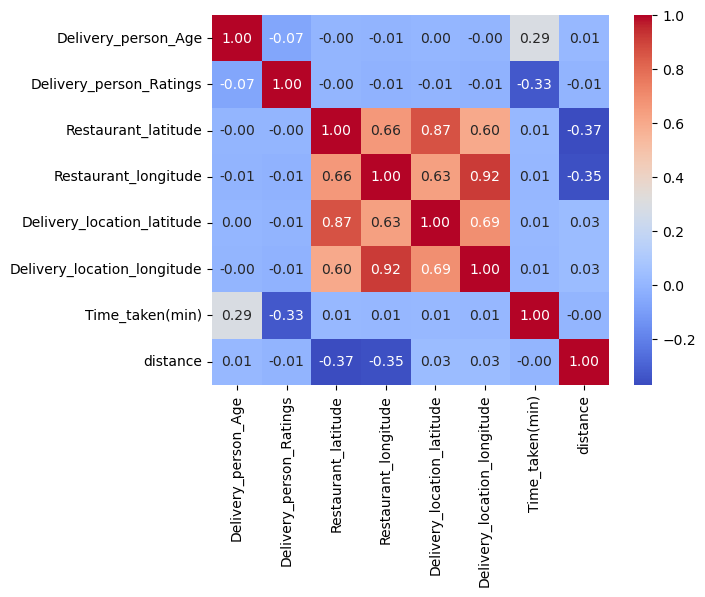

In [42]:
import seaborn as sns

sns.heatmap(numdataFrame.corr(),annot=True, cmap='coolwarm', fmt=".2f")

In [43]:
data['Time_taken(min)'].describe()

count    45501.000000
mean        26.293950
std          9.384537
min         10.000000
25%         19.000000
50%         26.000000
75%         32.000000
max         54.000000
Name: Time_taken(min), dtype: float64

In [50]:
data['distance'].mean()

99.10533879693547

In [49]:
data[data['distance']<data['distance'].mean()]

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),distance
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24,3.025149
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33,20.183530
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26,1.552758
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21,7.790401
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30,6.210138
...,...,...,...,...,...,...,...,...,...,...,...,...
45496,250B,CHENRES09DEL02,37,4.9,13.044694,80.261470,13.094694,80.311470,Snack,scooter,12,7.761498
45497,BE75,RANCHIRES12DEL03,38,4.8,0.000000,0.000000,0.090000,0.090000,Meal,scooter,29,14.152801
45498,73BC,SURRES12DEL03,22,4.7,21.183434,72.814492,21.273434,72.904492,Meal,scooter,17,13.681057
45499,E0BF,DEHRES16DEL02,25,5.0,30.342509,78.061187,30.392509,78.111187,Drinks,scooter,17,7.343128


In [47]:
data['distance'].describe()

count    45501.000000
mean        99.105339
std       1097.863656
min          1.465067
25%          4.663493
50%          9.264431
75%         13.765757
max      19692.674606
Name: distance, dtype: float64

In [74]:
shortdistanceDelivery = data[data['distance']<2500]

In [78]:
shortdistanceDelivery

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),distance
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24,3.025149
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33,20.183530
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26,1.552758
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21,7.790401
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30,6.210138
...,...,...,...,...,...,...,...,...,...,...,...,...
45496,250B,CHENRES09DEL02,37,4.9,13.044694,80.261470,13.094694,80.311470,Snack,scooter,12,7.761498
45497,BE75,RANCHIRES12DEL03,38,4.8,0.000000,0.000000,0.090000,0.090000,Meal,scooter,29,14.152801
45498,73BC,SURRES12DEL03,22,4.7,21.183434,72.814492,21.273434,72.904492,Meal,scooter,17,13.681057
45499,E0BF,DEHRES16DEL02,25,5.0,30.342509,78.061187,30.392509,78.111187,Drinks,scooter,17,7.343128


In [76]:
mediumdistanceDelivery = data[(data['distance']>=2500 and data['distance']<=7500)]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [75]:
longdistanceDelivery = data[data['distance']>=15000]

In [77]:
longdistanceDelivery

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),distance
289,4DB,PUNERES02DEL03,29,4.6,-18.551440,-73.804855,18.611440,73.864855,Meal,scooter,12,16612.239055
425,C003,DEHRES13DEL02,29,4.6,-30.366322,-78.070453,30.496322,78.200453,Snack,scooter,20,17744.205087
534,473,MYSRES07DEL03,29,4.6,-12.325461,-76.632278,12.385461,76.692278,Buffet,scooter,16,17118.828366
762,462,RANCHIRES11DEL03,29,4.6,-23.359194,-85.325447,23.449194,85.415447,Meal,motorcycle,15,19070.337839
1059,C013,KNPRES010DEL01,29,4.6,-26.477750,-80.351569,26.487750,80.361569,Buffet,motorcycle,15,18097.339322
...,...,...,...,...,...,...,...,...,...,...,...,...
43543,C007,BHPRES16DEL03,29,4.6,-23.264015,-77.408236,23.294015,77.438236,Meal,scooter,28,17449.110437
43866,46E,MUMRES08DEL02,29,4.6,-19.065838,-72.832658,19.195838,72.962658,Buffet,scooter,16,16427.638582
43870,4D9,PUNERES04DEL03,29,4.6,-18.514210,-73.838429,18.604210,73.928429,Drinks,scooter,25,16621.974076
44769,3F9,SURRES20DEL01,29,4.6,-21.152760,-72.778059,21.192760,72.818059,Buffet,motorcycle,33,16455.000162


In [56]:
shortdistanceDelivery.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min),distance
count,45071.000000,45071.000000,45071.000000,45071.000000,45071.000000,45071.000000,45071.000000,45071.000000
mean,29.540037,4.632664,17.376398,70.719938,17.440017,70.783557,26.297331,9.736626
std,5.693194,0.323013,7.338903,21.197243,7.340276,21.197454,9.384372,5.608614
min,15.000000,1.000000,0.000000,0.000000,0.010000,0.010000,10.000000,1.465067
25%,25.000000,4.500000,12.934179,73.170283,12.985996,73.277753,19.000000,4.663412
50%,29.000000,4.700000,18.554382,75.898497,18.632450,75.997648,26.000000,9.220209
75%,34.000000,4.800000,22.732225,78.045359,22.783839,78.101544,32.000000,13.681492
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,54.000000,20.969489


In [57]:
shortdistanceDelivery.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min),distance
count,45071.000000,45071.000000,45071.000000,45071.000000,45071.000000,45071.000000,45071.000000,45071.000000
mean,29.540037,4.632664,17.376398,70.719938,17.440017,70.783557,26.297331,9.736626
std,5.693194,0.323013,7.338903,21.197243,7.340276,21.197454,9.384372,5.608614
min,15.000000,1.000000,0.000000,0.000000,0.010000,0.010000,10.000000,1.465067
25%,25.000000,4.500000,12.934179,73.170283,12.985996,73.277753,19.000000,4.663412
50%,29.000000,4.700000,18.554382,75.898497,18.632450,75.997648,26.000000,9.220209
75%,34.000000,4.800000,22.732225,78.045359,22.783839,78.101544,32.000000,13.681492
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,54.000000,20.969489


In [59]:
shortdistanceDelivery.sort_values(by='distance')

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),distance
26585,C88C,LUDHRES04DEL01,21,4.5,30.914057,75.839820,30.924057,75.849820,Drinks,electric_scooter,13,1.465067
7410,CB5D,LUDHRES04DEL01,28,4.8,30.914057,75.839820,30.924057,75.849820,Snack,scooter,16,1.465067
33066,CD9D,LUDHRES04DEL01,21,4.9,30.914057,75.839820,30.924057,75.849820,Buffet,motorcycle,16,1.465067
32175,E16D,LUDHRES05DEL01,37,4.9,30.905562,75.832841,30.915562,75.842841,Snack,motorcycle,15,1.465123
28262,D35F,LUDHRES05DEL01,32,4.8,30.905562,75.832841,30.915562,75.842841,Buffet,electric_scooter,26,1.465123
...,...,...,...,...,...,...,...,...,...,...,...,...
25476,DB1A,ALHRES07DEL03,25,4.7,25.449659,81.839744,25.589659,81.979744,Snack,scooter,18,20.969045
16787,E25C,ALHRES07DEL03,38,4.6,25.449659,81.839744,25.589659,81.979744,Meal,motorcycle,46,20.969045
25926,DE83,ALHRES12DEL03,32,3.8,25.443994,81.860187,25.583994,82.000187,Snack,motorcycle,33,20.969489
912,D8AF,ALHRES12DEL03,22,4.7,25.443994,81.860187,25.583994,82.000187,Drinks,electric_scooter,26,20.969489


<Axes: xlabel='distance', ylabel='Time_taken(min)'>

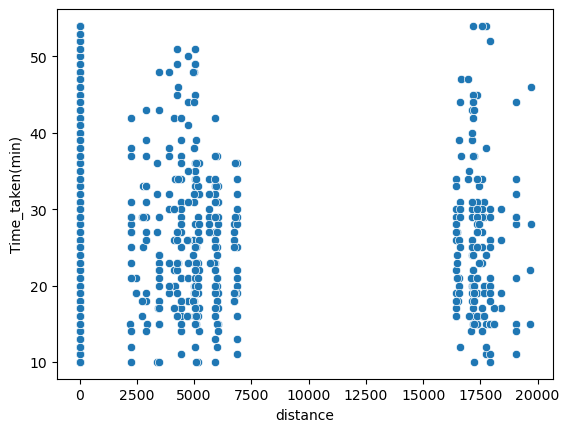

In [67]:
sns.scatterplot(x='distance',y='Time_taken(min)',data = data)

Text(0, 0.5, 'Y-axis')

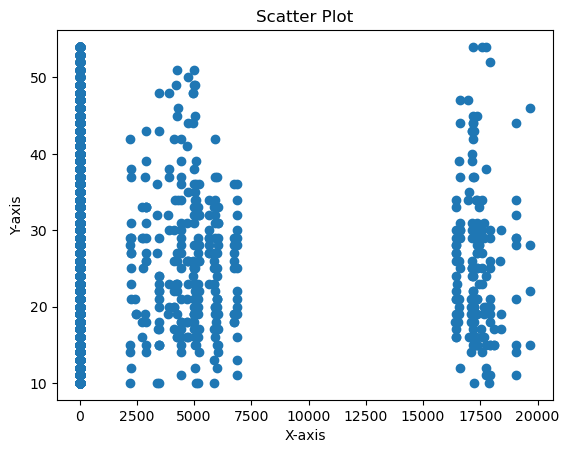

In [68]:
import matplotlib.pyplot as plt

# Example: Creating a scatter plot
x_values = data['distance']
y_values = data['Time_taken(min)']

plt.scatter(x_values, y_values)
plt.title('Scatter Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
